(150, 4)


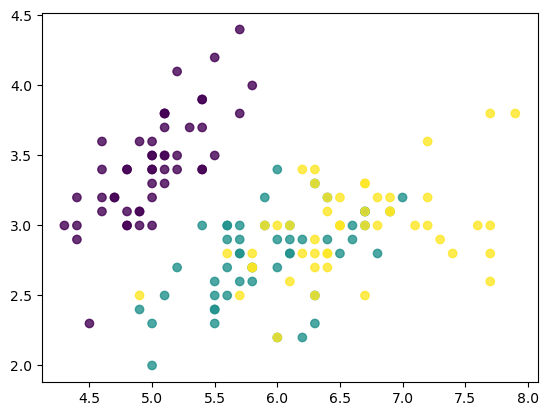

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris ()

X = iris.data
y = iris.target 

print (X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha =0.8)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5) # 20% de donnees dans le test set et 80% dans le train set 
print ("Train set", X_train.shape)
print ("Test set", X_test.shape)

Train set (120, 4)
Test set (30, 4)


Text(0.5, 1.0, 'Test set')

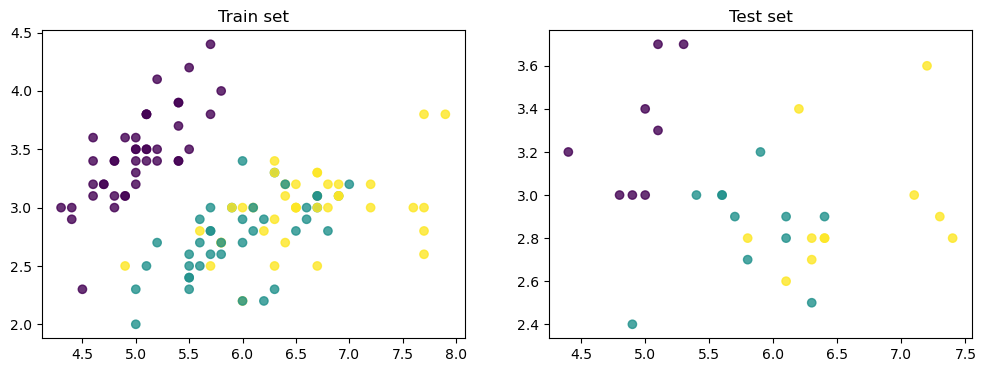

In [4]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, alpha = 0.8)
plt.title ("Train set")
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, alpha=0.8)
plt.title ("Test set")

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier (n_neighbors=2)
model.fit (X_train, y_train)
print ("Train Score", model.score(X_train, y_train))
print ("Test score", model.score (X_test, y_test))

Train Score 0.9833333333333333
Test score 0.9


Pour ameliorer notre modele on peut changer les parametres de n_neighbors et le nombre pour lequel le score sera le meilleur sera maintenue sauf quon a deja optimiser notre modele en utilsant indirectement le Test set et la il nous faut tester notre modele et on a plus de Test set. Pour resoudre ce probleme il faut decouper notre dataset en 3 Train set, Validation set und Test set. Pour ce faire on utilise cross_val_score qui va decouper notre dataset en 5 et le 1er sera le validation set et le reste le Train set et ensuite le 2e validation set et le reste Train set ainsi de suite jusqua avoir le 5e comme Validation set et apres en calculant la moyenne des validation score on aura le meilleur modele(different modele avec different parametres par exemples). A partir de cv = 5 on a 5 split. 

In [11]:
from sklearn.model_selection import cross_val_score     
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy").mean()

0.9833333333333334

[0.975, 0.9666666666666668, 0.975, 0.9666666666666668, 0.9833333333333334, 0.9583333333333334, 0.9666666666666668, 0.9666666666666668, 0.9833333333333334, 0.975, 0.9833333333333334, 0.975, 0.9833333333333334, 0.975, 0.9666666666666666, 0.975, 0.975, 0.95, 0.9583333333333334, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9333333333333333, 0.925, 0.9333333333333333, 0.925, 0.9166666666666667, 0.9333333333333333, 0.9083333333333334, 0.9166666666666666, 0.9, 0.8916666666666666, 0.8916666666666668, 0.9, 0.9, 0.8916666666666666, 0.8833333333333334, 0.8916666666666666, 0.8916666666666666, 0.8916666666666666, 0.8916666666666668, 0.875, 0.875, 0.8833333333333334, 0.875, 0.8916666666666666, 0.8916666666666668]


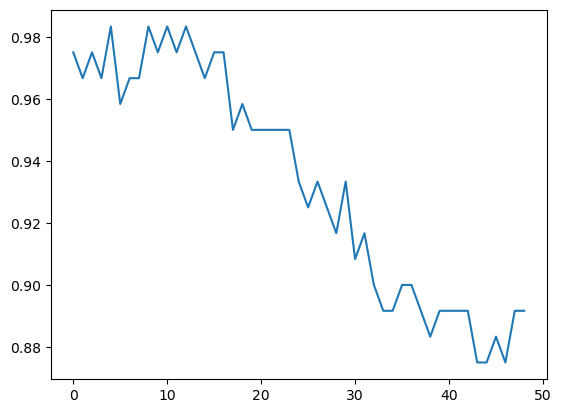

In [13]:
Val_score = []    # ceci cest pour avoir le modele ayant le meilleure parametre
for i in range (1,50):
    score = cross_val_score(KNeighborsClassifier (n_neighbors=i), X_train, y_train, cv=5, scoring="accuracy").mean()
    Val_score.append(score)
print (Val_score)
plt.plot(Val_score)

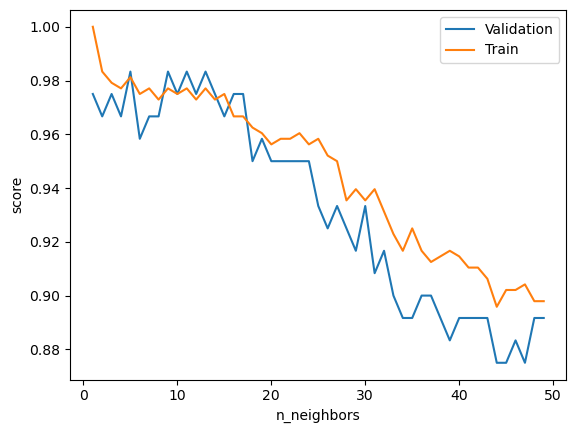

In [23]:
# ou pour ce faire sans utiliser la boucle for on utilise validation curve
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange (1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)
plt.plot(k, val_score.mean(axis=1), label="Validation")
plt.plot (k, train_score.mean(axis=1), label="Train")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.legend()

In [28]:
# comme nous pouvons vouloir faire varier plusieurs parametres alors la methode GridSearchCV est approprie au lieu de validation curve ou 
# on ne pouvait que faire varier qu'un seul parametre  
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": np.arange(1, 20), 
              "metric": ["euclidean", "manhattan"]}   # dictionaire avec les hyperparametres a regler qui sont ici n_neighbors et metric 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

On peut avoir les differents phyper parametres du modeles 

In [31]:
grid.best_score_    

0.9833333333333334

In [33]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [35]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))     # pour mieux comprendre quels sont les erreurs car ici dans la 1er calsse les 8 ont ete bien range 
# dans le second cas 9 ont ete bien range et 2 non et dans le 3e cas les 11 ont ete bien range 

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

Ici on veut savoir si avec plus de donnees la machine peut encore etre meilleure d'ou l'utilisation de learning_curve

[19 21 23 25 28 30 32 35 37 39 41 44 46 48 50 53 55 57 59 62 64 66 68 71
 73 75 77 80 82 84 86 89 91 93 96]


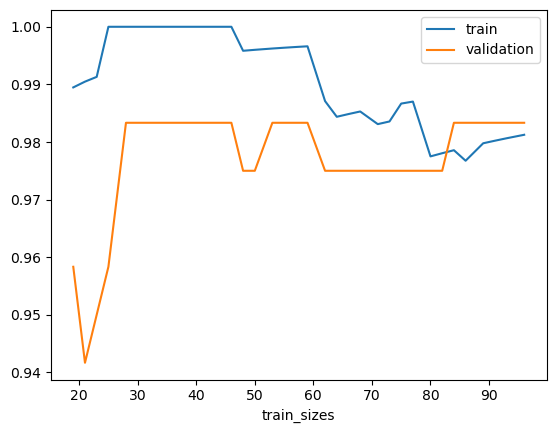

In [83]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve (model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 35), cv = 5)

print (N)
plt.plot (N, train_score.mean(axis=1), label = "train")
plt.plot (N, val_score.mean(axis=1), label = "validation")
plt.xlabel("train_sizes")
plt.legend ()

In [38]:
# 1) Creer un Train set et un Test set. Entrainer puis evaluer
# 2) Avec GrdiSearch, trouver les meilleurs hyper-parametres n_neighbors, metrics et weights 
# 3) est ce que collecter plus de donnees serait utile ?
# 4) Partage tes resultats en commentaire!  :) 

In [40]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
titanic= titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace= True)
titanic["sex"].replace(["male","female"], [0, 1], inplace=True)
titanic.head()

C:\Users\jodel\AppData\Local\Temp\ipykernel_19980\2466528091.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["sex"].replace(["male","female"], [0, 1], inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [50]:
X = titanic.drop("survived", axis = 1)
Y = titanic["survived"]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5) # 20% de donnees dans le test set et 80% dans le train set 
print ("Train set", X_train.shape)
print ("Test set", X_test.shape)

Train set (571, 3)
Test set (143, 3)


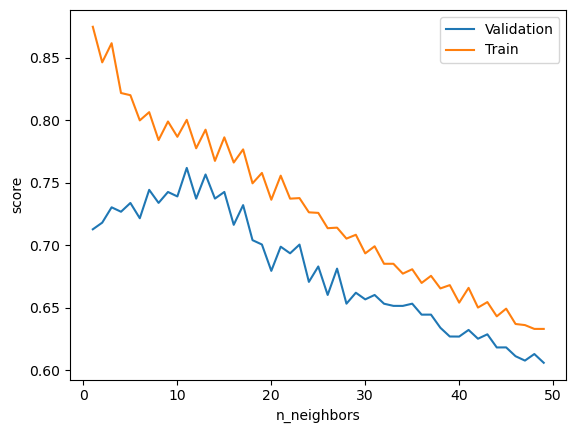

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange (1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)
plt.plot(k, val_score.mean(axis=1), label="Validation")
plt.plot (k, train_score.mean(axis=1), label="Train")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.legend()

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": np.arange(1, 50), 
              "metric": ["euclidean", "manhattan"]}   # dictionaire avec les hyperparametres a regler qui sont ici n_neighbors et metric 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [69]:
grid.best_score_

0.7810983981693363

In [71]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [73]:
model = grid.best_estimator_
model.score (X_test, y_test)

0.7202797202797203

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))   

array([[72, 16],
       [24, 31]], dtype=int64)

[ 91  94  98 102 105 109 113 116 120 124 128 131 135 139 142 146 150 153
 157 161 164 168 172 175 179 183 187 190 194 198 201 205 209 212 216 220
 223 227 231 234 238 242 245 249 253 257 260 264 268 271 275 279 282 286
 290 293 297 301 304 308 312 315 319 323 327 330 334 338 341 345 349 352
 356 360 363 367 371 374 378 382 385 389 393 397 400 404 408 411 415 419
 422 426 430 433 437 441 444 448 452 456]


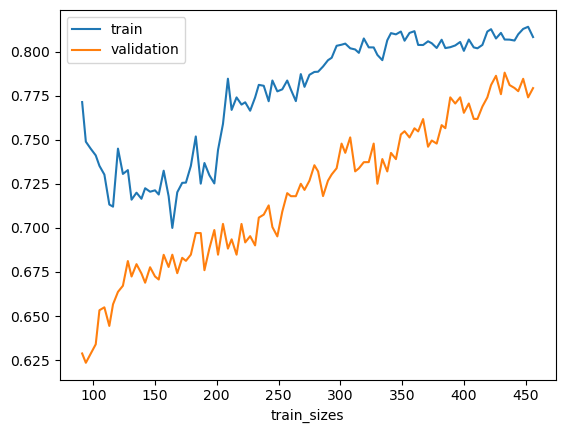

In [79]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve (model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 100), cv = 5)

print (N)
plt.plot (N, train_score.mean(axis=1), label = "train")
plt.plot (N, val_score.mean(axis=1), label = "validation")
plt.xlabel("train_sizes")
plt.legend ()